In [465]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [630]:
ted_main = pd.read_csv(r'D:\Machine Learning\Datasets\ted-talks\ted_main.csv')
transcripts = pd.read_csv(r'D:\Machine Learning\Datasets\ted-talks\transcripts.csv')

<p><b>Ted_main:</b></p>
<ul>
  <li> <b> comments </b> - The number of first level comments made on the talk </li>
  <li> <b> description </b>  - A blurb of what the talk is about </li>
  <li> <b> uration </b> -  The duration of the talk in seconds </li>
  <li> <b> event </b> -  The TED/TEDx event where the talk took place </li>
  <li> <b> film_date </b> -  The Unix timestamp of the filming </li>
  <li> <b> languages </b> -  The number of languages in which the talk is available </li>
  <li> <b> main_speaker </b> -  The first named speaker of the talk </li>
  <li> <b> name </b> - The official name of the TED Talk. Includes the title and the speaker. </li>
  <li> <b> num_speaker </b> - The number of speakers in the talk <br>
  <li> <b> published_date </b> - The Unix timestamp for the publication of the talk on TED.com </li>
  <li> <b> ratings </b> -  A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) </li>
  <li> <b> related_talks </b>  A list of dictionaries of recommended talks to watch next </li>
  <li> <b> speaker_occupation </b> - The occupation of the main speaker </li>
  <li> <b> tags </b> - The themes associated with the talk </li>
  <li> <b> title </b> - The title of the talk </li>
  <li> <b> url </b> - The URL of the talk </li>
  <li> <b> views </b> - The number of views on the talk </li>
</ul>

<p><b>transcripts:</b></p>
<ul>
  <li><b> transcript </b> - The official English transcript of the talk</li>
  <li><b> url </b> - The URL of the talk <br></li>
</ul>

In [631]:
ted_main.shape

(2550, 17)

In [632]:
transcripts.shape

(2467, 2)

In [633]:
ted_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [468]:
ted_main.sort_values('views', ascending=False)[:20]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,1340668800,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,1349103608,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",Social psychologist,"['body language', 'brain', 'business', 'psycho...",Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,1253145600,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,1272965460,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,1275782400,52,Brené Brown,Brené Brown: The power of vulnerability,1,1293115500,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,1233878400,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,1242781200,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['books', 'culture', 'history', 'humor', 'scie...",10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,1370822400,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,1403879897,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",Sound consultant,"['culture', 'sound', 'speech']",How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,1449532800,43,James Veitch,James Veitch: This is what happens when you re...,1,1452269020,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['comedy', 'communication', 'curiosity', 'humo...",This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_t

In [469]:
ted_main.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [470]:
ted_main.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [471]:
ted_main[ted_main.speaker_occupation.isnull()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [472]:
ted_main[ted_main.main_speaker.isin(ted_main[ted_main.speaker_occupation.isnull()].main_speaker.values)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [473]:
ted_main.speaker_occupation.value_counts()

Writer                                          45
Designer                                        34
Artist                                          34
Journalist                                      33
Entrepreneur                                    31
Architect                                       30
Inventor                                        27
Psychologist                                    26
Photographer                                    25
Filmmaker                                       21
Author                                          20
Educator                                        20
Economist                                       20
Neuroscientist                                  20
Philosopher                                     16
Roboticist                                      16
Biologist                                       15
Physicist                                       14
Marine biologist                                11
Musician                       

We can try to use a simple google search to find out their occupation

Sonaar Luthra -   Designer, Entrepreneur, Environmentalist, Social entrepreneur, Technologist
Rick Falkvinge - Technologist , Entrepreneur, Politician
Gary Kovacs - Technologist
Ryan Holladay - Musician
Brian Dettmer - Artist
Boniface Mwangi - Photographer, Journalist, Politician, Activist

In [474]:
ted_main.loc[ted_main.main_speaker == 'Sonaar Luthra', 'speaker_occupation'] = 'Designer, Entrepreneur, Environmentalist, Social entrepreneur, Technologist'
ted_main.loc[ted_main.main_speaker == 'Rick Falkvinge', 'speaker_occupation'] = 'Technologist , Entrepreneur, Politician'
ted_main.loc[ted_main.main_speaker == 'Gary Kovacs', 'speaker_occupation'] = 'Technologist'
ted_main.loc[ted_main.main_speaker == 'Ryan Holladay', 'speaker_occupation'] = 'Musician'
ted_main.loc[ted_main.main_speaker == 'Brian Dettmer', 'speaker_occupation'] = 'Artist'
ted_main.loc[ted_main.main_speaker == 'Boniface Mwangi', 'speaker_occupation'] = 'Photographer, Journalist, Politician, Activist'

In [475]:
ted_main.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [476]:
ted_main['film_date_formated'] =  pd.to_datetime(ted_main['film_date'],unit='s')
ted_main['published_date_formated'] =  pd.to_datetime(ted_main['published_date'],unit='s')

# EDA

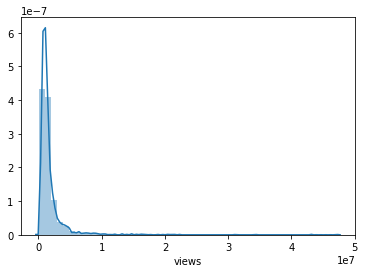

In [477]:
sns.distplot(ted_main['views'])
plt.show()

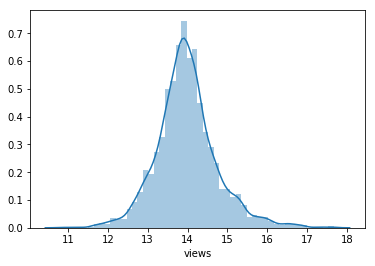

In [478]:
sns.distplot((np.log(ted_main['views'])))
plt.show()

In [479]:
ted_main['views_log'] = np.log(ted_main['views'])

Taking a test set aside, before continuing further with the EDA

In [480]:
print('max:', str(max(ted_main['views_log'])), 'min:', str(min(ted_main['views_log'])))

max: 17.67047865007846 min: 10.828599264916061


In [481]:
bins = list(range(12,19))
bins.append(10)
bins.sort()
ted_main['views_binned'] = pd.cut(ted_main['views_log'], bins)

In [482]:
ted_main['views_binned'].value_counts()

(13, 14]    1173
(14, 15]     932
(12, 13]     201
(15, 16]     184
(16, 17]      38
(10, 12]      18
(17, 18]       4
Name: views_binned, dtype: int64

In [483]:
ted_main.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'film_date_formated', 'published_date_formated',
       'views_log', 'views_binned'],
      dtype='object')

In [484]:
train_columns = []
for column in ted_main.columns:
    if not 'views' in column:
        train_columns.append(column)
train_columns

['comments',
 'description',
 'duration',
 'event',
 'film_date',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'published_date',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url',
 'film_date_formated',
 'published_date_formated']

In [485]:
set(ted_main.columns).difference(train_columns)

{'views', 'views_binned', 'views_log'}

In [616]:
X_train_org, X_test, y_train, y_test =  train_test_split(ted_main[train_columns],
                                                     ted_main['views'],
                                                     test_size=0.2,
                                                     random_state=42,
                                                    stratify=ted_main['views_binned'])

In [619]:
X_train_org.to_csv(r'D:\Machine Learning\Datasets\ted-talks\X_train.csv', index=False)
X_test.to_csv(r'D:\Machine Learning\Datasets\ted-talks\X_test.csv', index=False)
y_train.to_csv(r'D:\Machine Learning\Datasets\ted-talks\y_train.csv', index=False)
y_test.to_csv(r'D:\Machine Learning\Datasets\ted-talks\y_test.csv', index=False)

In [487]:
X_train = X_train_org.copy()

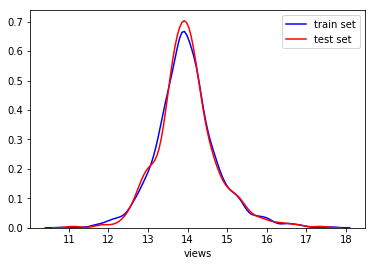

In [490]:
sns.distplot(np.log(y_train), color='blue',hist=False,  label='train set')
sns.distplot(np.log(y_test), color='red', hist=False, label='test set')
plt.legend()
plt.show()

In [491]:
set(ted_main.columns).intersection(X_train.columns)

{'comments',
 'description',
 'duration',
 'event',
 'film_date',
 'film_date_formated',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'published_date',
 'published_date_formated',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url'}

In [492]:
set(ted_main.columns).difference(X_train.columns)

{'views', 'views_binned', 'views_log'}

## EDA on quantitative variables 

In [493]:
y_train_log = np.log(y_train) # log of y_train has a normal distribution

In [494]:
y_train_log.name = 'views_log'

In [495]:
X_train.dtypes

comments                            int64
description                        object
duration                            int64
event                              object
film_date                           int64
languages                           int64
main_speaker                       object
name                               object
num_speaker                         int64
published_date                      int64
ratings                            object
related_talks                      object
speaker_occupation                 object
tags                               object
title                              object
url                                object
film_date_formated         datetime64[ns]
published_date_formated    datetime64[ns]
dtype: object

In [496]:
X_train_quant = X_train.select_dtypes(np.int64)

In [497]:
pd.concat([X_train_quant, y_train], axis=1).corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.150867,-0.130541,0.303417,-0.041078,-0.181452,0.506811
duration,0.150867,1.000000,-0.253342,-0.286280,0.011824,-0.168212,0.052208
film_date,-0.130541,-0.253342,1.000000,-0.044646,0.038562,0.896656,0.010692
languages,0.303417,-0.286280,-0.044646,1.000000,-0.061477,-0.156970,0.374055
num_speaker,-0.041078,0.011824,0.038562,-0.061477,1.000000,0.048532,-0.027547
published_date,-0.181452,-0.168212,0.896656,-0.156970,0.048532,1.000000,-0.013190
views,0.506811,0.052208,0.010692,0.374055,-0.027547,-0.013190,1.000000


### Comments

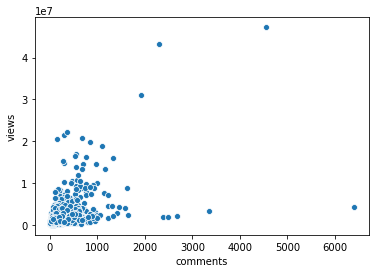

In [498]:
sns.scatterplot(X_train_quant.comments, y_train)
plt.show()

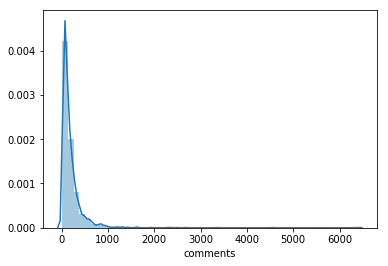

In [499]:
sns.distplot(X_train_quant.comments)
plt.show()

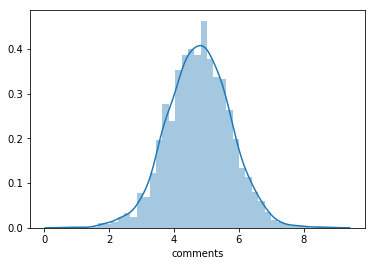

In [500]:
sns.distplot(np.log(X_train_quant.comments))
plt.show()

In [501]:
X_train_quant['comments_log'] = np.log(X_train_quant.comments)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


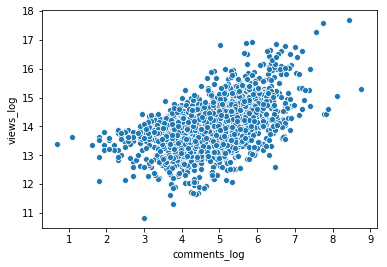

In [502]:
sns.scatterplot(X_train_quant.comments_log, y_train_log)
plt.show()

### Durration

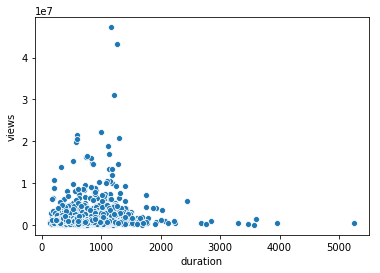

In [503]:
sns.scatterplot(X_train_quant.duration, y_train)
plt.show()

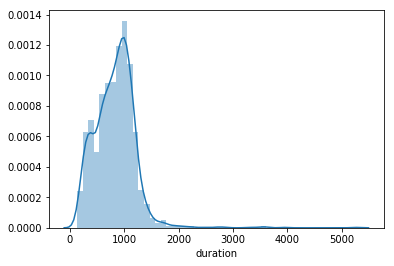

In [504]:
sns.distplot(X_train_quant.duration)
plt.show()

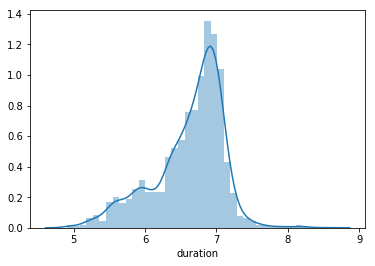

In [505]:
sns.distplot(np.log(X_train_quant.duration))
plt.show()

In [506]:
X_train_quant['duration_log'] = np.log(X_train_quant.duration)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


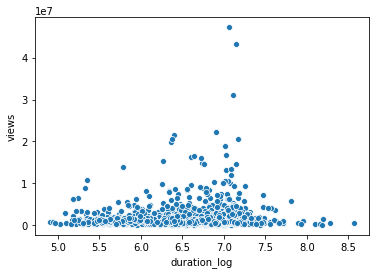

In [507]:
sns.scatterplot(X_train_quant.duration_log, y_train)
plt.show()

### Languages

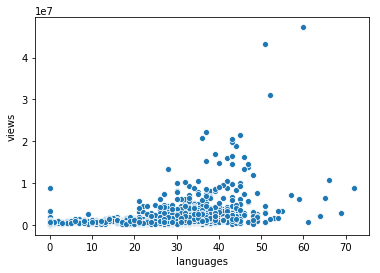

In [508]:
sns.scatterplot(X_train_quant.languages, y_train)
plt.show()

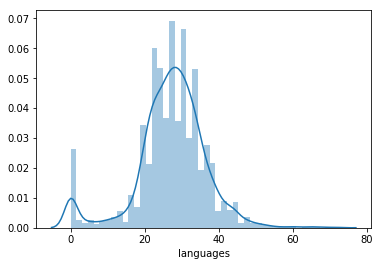

In [509]:
sns.distplot(X_train_quant.languages)
plt.show()

### Number of speakers

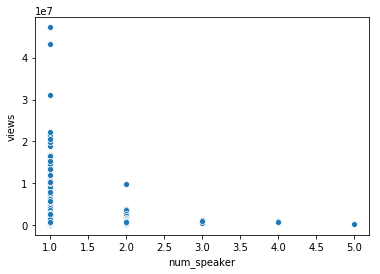

In [510]:
sns.scatterplot(X_train_quant.num_speaker, y_train)
plt.show()

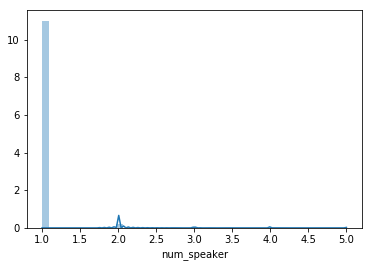

In [511]:
sns.distplot(X_train_quant.num_speaker)
plt.show()

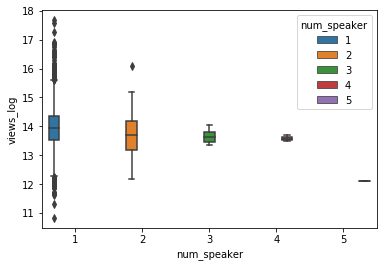

In [515]:
sns.boxplot(x='num_speaker',
            y='views_log',
            data=pd.concat([X_train_quant.num_speaker, y_train_log], axis=1), hue='num_speaker')
plt.show()

In [516]:
X_train_quant.num_speaker.value_counts()

1    1994
2      38
3       4
4       3
5       1
Name: num_speaker, dtype: int64

In [517]:
pd.concat([X_train_quant, y_train, y_train_log], axis=1).corr()

,comments,duration,film_date,languages,num_speaker,published_date,comments_log,duration_log,views,views_log
comments,1.000000,0.150867,-0.130541,0.303417,-0.041078,-0.181452,0.691023,0.144963,0.506811,0.420305
duration,0.150867,1.000000,-0.253342,-0.286280,0.011824,-0.168212,0.152785,0.917707,0.052208,0.027102
film_date,-0.130541,-0.253342,1.000000,-0.044646,0.038562,0.896656,-0.207413,-0.137200,0.010692,0.175202
languages,0.303417,-0.286280,-0.044646,1.000000,-0.061477,-0.156970,0.452082,-0.309364,0.374055,0.543813
num_speaker,-0.041078,0.011824,0.038562,-0.061477,1.000000,0.048532,-0.091565,-0.027468,-0.027547,-0.059379
published_date,-0.181452,-0.168212,0.896656,-0.156970,0.048532,1.000000,-0.323855,-0.088921,-0.013190,0.151580
comments_log,0.691023,0.152785,-0.207413,0.452082,-0.091565,-0.323855,1.000000,0.151035,0.401846,0.499042
duration_log,0.144963,0.917707,-0.137200,-0.309364,-0.027468,-0.088921,0.151035,1.000000,0.060806,0.060081
views,0.506811,0.052208,0.010692,0.374055,-0.027547,-0.013190,0.401846,0.060806,1.000000,0.727085
views_log,0.420305,0.027102,0.175202,0.543813,-0.059379,0.151580,0.499042,0.060081,0.727085,1.000000


## EDA on Qualitative variables

In [518]:
X_train_qualit = X_train.select_dtypes(np.object)

In [519]:
X_train_qualit.head()

,description,event,main_speaker,name,ratings,related_talks,speaker_occupation,tags,title,url
708,Michael Shermer says the human tendency to bel...,TED2010,Michael Shermer,Michael Shermer: The pattern behind self-decep...,"[{'id': 7, 'name': 'Funny', 'count': 475}, {'i...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...",Skeptic,"['God', 'faith', 'neuroscience', 'psychology',...",The pattern behind self-deception,https://www.ted.com/talks/michael_shermer_the_...
1960,Collective compassion has meant an overall dec...,TED2015,Gary Haugen,Gary Haugen: The hidden reason for poverty the...,"[{'id': 1, 'name': 'Beautiful', 'count': 195},...","[{'id': 644, 'hero': 'https://pe.tedcdn.com/im...",Human rights attorney,"['inequality', 'poverty', 'violence']",The hidden reason for poverty the world needs ...,https://www.ted.com/talks/gary_haugen_the_hidd...
1566,Gayla Benefield was just doing her job -- unti...,TEDxDanubia,Margaret Heffernan,Margaret Heffernan: The dangers of willful bli...,"[{'id': 3, 'name': 'Courageous', 'count': 413}...","[{'id': 1533, 'hero': 'https://pe.tedcdn.com/i...",Management thinker,"['TEDx', 'corruption', 'culture', 'global issu...",The dangers of willful blindness,https://www.ted.com/talks/margaret_heffernan_t...
1780,We often think of bias and prejudice as rooted...,TEDSalon NY2014,Paul Bloom,Paul Bloom: Can prejudice ever be a good thing?,"[{'id': 11, 'name': 'Longwinded', 'count': 35}...","[{'id': 1198, 'hero': 'https://pe.tedcdn.com/i...",Psychologist,"['behavioral economics', 'mind', 'psychology']",Can prejudice ever be a good thing?,https://www.ted.com/talks/paul_bloom_can_preju...
640,"Blind river dolphins, reclusive lemurs, a parr...",University of California,Douglas Adams,"Douglas Adams: Parrots, the universe and every...","[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...","Author, satirist","['biodiversity', 'biology', 'comedy', 'humor',...","Parrots, the universe and everything",https://www.ted.com/talks/douglas_adams_parrot...


###  speaker_occupation

In [624]:
len(X_train_qualit.speaker_occupation.unique())

1216

In [621]:
X_train_qualit.speaker_occupation.value_counts()

Writer                                               33
Architect                                            27
Artist                                               27
Journalist                                           25
Designer                                             25
Entrepreneur                                         23
Inventor                                             22
Psychologist                                         21
Photographer                                         18
Author                                               18
Filmmaker                                            18
Educator                                             17
Roboticist                                           14
Economist                                            14
Neuroscientist                                       13
Philosopher                                          13
Biologist                                            12
Musician                                        

In [627]:
X_train_qualit.speaker_occupation.value_counts()[:100].values.sum()

744

In [628]:
X_train_qualit.speaker_occupation.value_counts()[:40]

Writer                                  33
Architect                               27
Artist                                  27
Journalist                              25
Designer                                25
Entrepreneur                            23
Inventor                                22
Psychologist                            21
Photographer                            18
Author                                  18
Filmmaker                               18
Educator                                17
Roboticist                              14
Economist                               14
Neuroscientist                          13
Philosopher                             13
Biologist                               12
Musician                                11
Marine biologist                        11
Physicist                               10
Astronomer                               9
Behavioral economist                     9
Graphic designer                         9
Technologis

### Event

In [520]:
len(X_train_qualit.event.unique())

318

In [521]:
X_train_qualit.event.unique()

array(['TED2010', 'TED2015', 'TEDxDanubia', 'TEDSalon NY2014',
       'University of California', 'TED@State Street Boston', 'TED2014',
       'TEDIndia 2009', 'TEDGlobal 2009', 'TEDMED 2014', 'TEDxUSC',
       'TEDGlobal 2010', 'Stanford University', 'TED2007', 'TED2006',
       'TEDxBeaconStreet', 'TED Talks Live', 'TED2003',
       'TEDxToronto 2010', 'TED1998', 'TEDMED 2011', 'TED2012',
       'TEDxBoston 2012', 'TED2005', 'TEDxAtlanta', 'TED2002',
       'TEDxGhent', 'TEDxKids@Ambleside', 'TEDYouth 2015',
       'TEDxBoston 2011', 'TED2017', 'TED@NYC', 'TEDGlobal 2013',
       'TEDGlobal 2012', 'TEDxLondonBusinessSchool', 'TEDWomen 2016',
       'TEDxCERN', 'TEDSummit', 'TEDxManchester', 'TEDxAustin',
       'Mission Blue Voyage', 'TEDGlobal 2011', 'TEDGlobal 2007',
       'TED2009', 'TEDGlobal 2014', 'TEDxWomen 2011', 'TEDWomen 2015',
       'TED Fellows Retreat 2013', 'TED2016', 'TEDxVienna',
       'TEDWomen 2010', 'Justice with Michael Sandel', 'INK Conference',
       'TED200

In [522]:
X_train_qualit.event.value_counts()[:60]

TED2014                   65
TED2009                   63
TED2015                   60
TED2013                   60
TED2016                   60
TED2010                   57
TEDGlobal 2012            56
TEDGlobal 2011            56
TED2011                   55
TEDGlobal 2013            54
TEDGlobal 2009            54
TED2012                   52
TED2007                   52
TED2017                   52
TEDGlobal 2010            44
TEDGlobal 2014            41
TED2008                   39
TED2006                   33
TED2003                   32
TED2005                   32
TEDWomen 2010             29
TEDSummit                 28
TEDIndia 2009             28
TED2004                   27
TEDWomen 2015             25
TEDGlobal 2007            24
TED2002                   24
TEDGlobal 2005            21
TEDWomen 2016             21
TED Talks Live            17
TEDNYC                    17
TEDxMidAtlantic           16
TEDxBeaconStreet          16
Mission Blue Voyage       16
EG 2007       

In [523]:
top_events = X_train_qualit.event.value_counts()[:12].index.tolist()

In [526]:
event_df = pd.concat([X_train_qualit, y_train]).groupby('event')

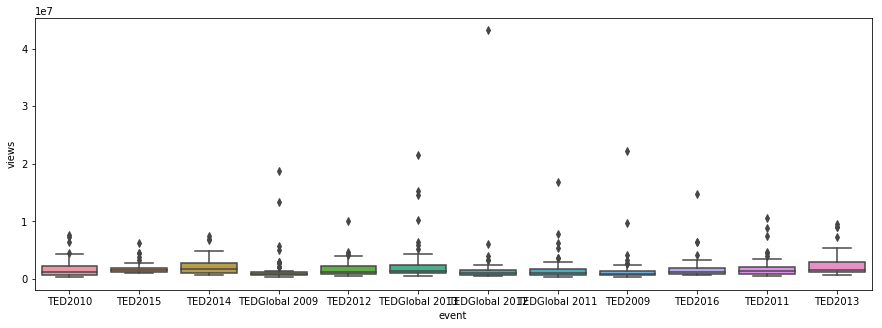

In [527]:
plt.figure(figsize=(15,5))
sns.boxplot(x='event', y='views', data=pd.concat([X_train_qualit, y_train],axis=1)[X_train_qualit['event'].isin(top_events)])
plt.show()

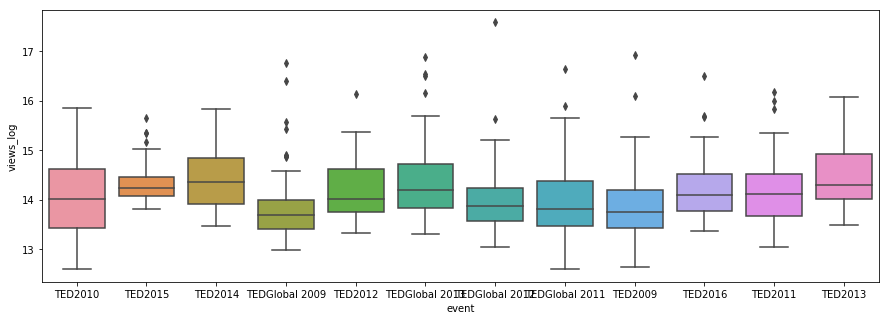

In [528]:
plt.figure(figsize=(15,5))
sns.boxplot(x='event', y='views_log', data=pd.concat([X_train_qualit, y_train_log],axis=1)[X_train_qualit['event'].isin(top_events)])
plt.show()

In [529]:
X_train_qualit.event.value_counts()[-15:]

TEDGlobal 2017                   1
TEDxAthens                       1
AORN Congress                    1
TEDxO'Porto                      1
TEDxSonomaCounty                 1
TEDxEuston                       1
TED1994                          1
TEDxVirginiaTech                 1
TEDYouth 2011                    1
TEDxManhattan                    1
TEDxPenn                         1
Toronto Youth Corps              1
TEDxLeuvenSalon                  1
TEDxMonroeCorrectionalComplex    1
TEDxGoldenGatePark 2012          1
Name: event, dtype: int64

### Published_date_formated 

In [530]:
days_count = X_train.film_date_formated.apply(lambda x: x.day_name()).value_counts()

In [531]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

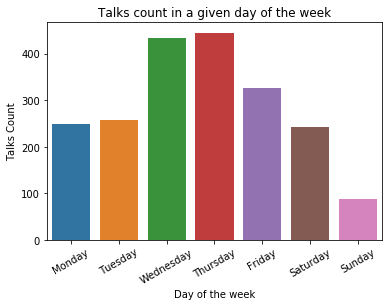

In [532]:
d_bp = sns.barplot(days_count.index, days_count.values, order=days_order)
d_bp.set_xticklabels(labels=days_order, rotation=30)
d_bp.set_xlabel('Day of the week')
d_bp.set_ylabel('Talks Count')
d_bp.set_title("Talks count in a given day of the week")
plt.show()

In [533]:
X_train['day_name'] = X_train.film_date_formated.apply(lambda x: x.day_name())

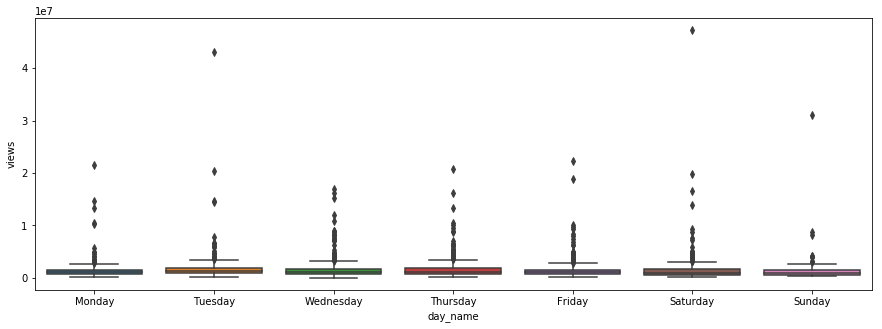

In [534]:
plt.figure(figsize=(15,5))
sns.boxplot(x='day_name', y='views',
            data=pd.concat([X_train, y_train],axis=1),order=days_order)
plt.show()

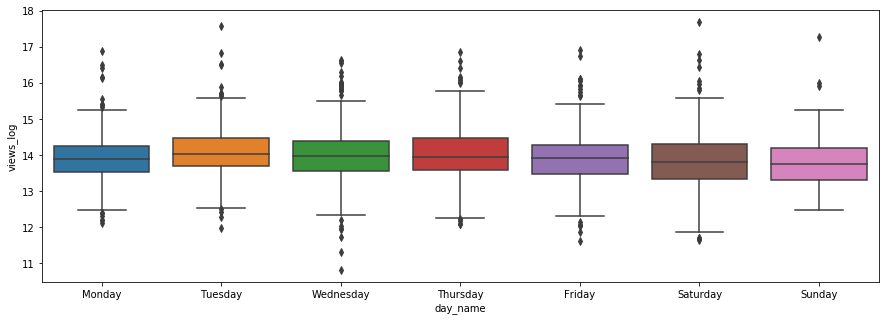

In [535]:
plt.figure(figsize=(15,5))
sns.boxplot(x='day_name', y='views_log',
            data=pd.concat([X_train, y_train_log],axis=1),order=days_order)
plt.show()

In [536]:
month_count = X_train.film_date_formated.apply(lambda x: x.month_name()).value_counts()
month_count

February     476
March        313
June         223
July         205
November     179
October      166
April        132
May          103
December     103
September     90
January       28
August        22
Name: film_date_formated, dtype: int64

In [537]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September', 'October', 
               'November', 'December']

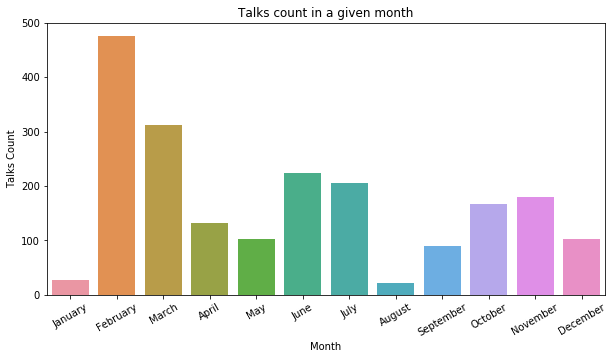

In [538]:
plt.figure(figsize=(10,5))
m_bp = sns.barplot(month_count.index, month_count.values, order=month_order)
m_bp.set_xticklabels(labels=month_order, rotation=30)
m_bp.set_xlabel('Month')
m_bp.set_ylabel('Talks Count')
m_bp.set_title("Talks count in a given month")
plt.show()

In [539]:
X_train['month_name'] = X_train.film_date_formated.apply(lambda x: x.month_name())

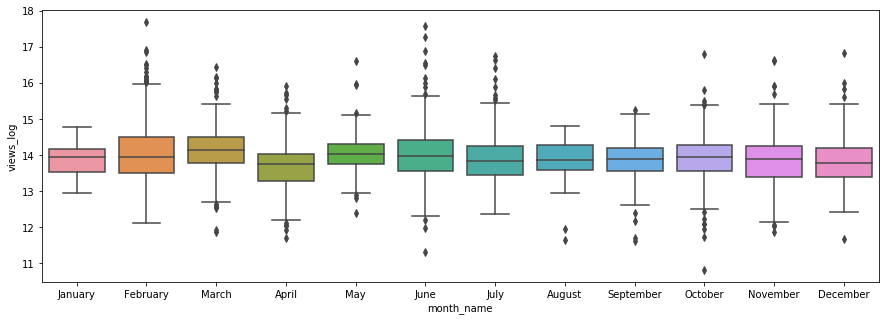

In [540]:
plt.figure(figsize=(15,5))
sns.boxplot(x='month_name', y='views_log',
            data=pd.concat([X_train, y_train_log],axis=1),order=month_order)
plt.show()

In [541]:
year_count = X_train.film_date_formated.apply(lambda x: x.year).value_counts()
year_count

2010    223
2013    220
2011    211
2012    210
2015    191
2016    191
2014    188
2009    182
2007     93
2017     77
2008     64
2005     55
2006     37
2003     31
2004     28
2002     24
1998      6
2001      4
1994      1
1991      1
1990      1
1983      1
1972      1
Name: film_date_formated, dtype: int64

In [542]:
X_train['year'] = X_train.film_date_formated.apply(lambda x: x.year)

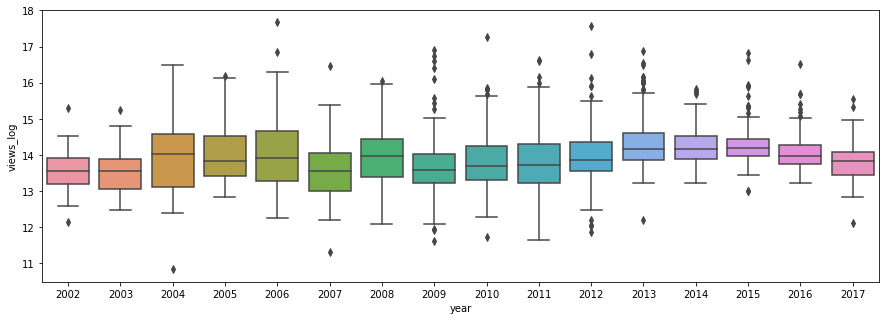

In [545]:
plt.figure(figsize=(15,5))
sns.boxplot(x='year', y='views_log',
            data=pd.concat([X_train, y_train_log],axis=1)[X_train.year>=2002],
            order=list(range(2002,2018)))
plt.show()

# Base model

In [602]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [548]:
X_train_quant.head()

,comments,duration,film_date,languages,num_speaker,published_date,comments_log,duration_log
708,837,1141,1265760000,34,1,1276507380,6.729824,7.039660
1960,305,1328,1426550400,30,1,1429542970,5.720312,7.191429
1566,289,878,1363910400,30,1,1376319512,5.666427,6.777647
1780,101,983,1389744000,26,1,1404399605,4.615121,6.890609
640,101,5256,989971200,0,1,1268762040,4.615121,8.567126


In [552]:
X_base_model = X_train_quant[['comments', 'duration', 'languages', 'film_date']]

In [553]:
X_base_model['year'] = X_train.film_date_formated.apply(lambda x: x.year)
X_base_model['day'] = X_train.film_date_formated.apply(lambda x: x.day)
X_base_model['month'] = X_train.film_date_formated.apply(lambda x: x.month)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [613]:
cv = cross_validate(LinearRegression(),StandardScaler().fit_transform(X_base_model), y_train, cv=5)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [614]:
cv['train_score']

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.33121422, 0.2792188 , 0.40548523, 0.32428023, 0.33679843])

In [615]:
cv['test_score']

array([ 0.27094709,  0.44804736, -0.39187442,  0.33947453,  0.2917017 ])

In [598]:
X_base_model_log = X_base_model.copy()
X_base_model_log['comments'] = np.log(X_base_model_log['comments'])
X_base_model_log['duration'] =np.log(X_base_model_log['duration'])

In [609]:
kf = KFold(n_splits=5)
X_base_model_log = StandardScaler().fit_transform(X_base_model_log)
kf.get_n_splits(X_base_model_log)
lr = LinearRegression()
cv = []
train = []
for train_index, test_index in kf.split(X_base_model_log):
    X_tr, X_val = X_base_model_log[train_index], X_base_model_log[test_index]
    y_tr, y_val = y_train_log.iloc[train_index], y_train_log.iloc[test_index]
    lr.fit(X_tr,y_tr)
    cv.append(r2_score(np.exp(lr.predict(X_val)), np.exp(y_val)))
    train.append(r2_score(np.exp(lr.predict(X_tr)), np.exp(y_tr)))

In [610]:
cv

[-4.26881230873675,
 -5.709321254020559,
 -5.871667976970315,
 -3.0639557859998936,
 -14.098259934897307]

In [611]:
train

[-6.366994280950625,
 -6.733748858590845,
 -7.427354727689208,
 -7.251523475783204,
 -4.703339677934468]